## 📝 Model Parameter 정리
1. 개념
- Model Parameter = LLM(대규모 언어 모델)의 출력 방식과 성격을 제어하는 설정값
- 같은 모델이라도 파라미터 값에 따라 창의적/보수적, 짧은 답변/긴 답변, 일관성/다양성 등이 달라짐
- LangChain, OpenAI, Groq, Ollama 등 다양한 백엔드에서 공통적으로 쓰임

2. 주요 파라미터
- 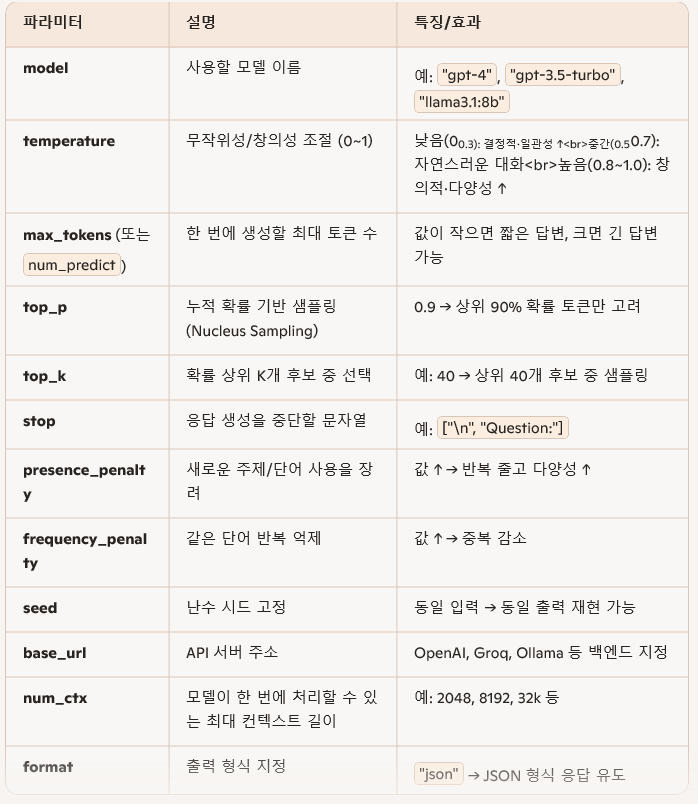



3. 자주 쓰이는 조합
- 정확하고 일관된 답변: temperature=0, top_p=1.0
- 자연스러운 대화: temperature=0.7, top_p=0.9
- 브레인스토밍/창의적 아이디어: temperature=0.9, top_p=0.95

4. 핵심 요약
- Model Parameter = 모델의 성격을 바꾸는 다이얼
- temperature, top_p, top_k → 창의성/무작위성 제어
- max_tokens, stop → 출력 길이/중단 조건 제어
- penalty 계열 → 반복 억제·다양성 확보
- seed → 재현성 보장




In [2]:
from dotenv import load_dotenv
import os
# .env 파일을 불러와서 환경 변수로 설정
load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
print(OPENAI_API_KEY[:5])

gsk_y


### 1) 모델 클래스 유형

In [ ]:
## LLM

from langchain_openai import OpenAI

# model을 지정하지 않아도 실행되는 이유는 LangChain이 내부적으로 기본값을 설정함
llm = OpenAI()
print(llm.model_name)  # 기본 모델 확인

result = llm.invoke("한국의 대표적인 관광지 3군데를 추천해 주세요.")
print(type(result))
print(result)

## ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

#chat = ChatOpenAI(model="gpt-3.5-turbo-0125")
chat = ChatOpenAI(
    #api_key=OPENAI_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq API 엔드포인트
    #model="meta-llama/llama-4-scout-17b-16e-instruct",
    model="moonshotai/kimi-k2-instruct-0905",
    temperature=0.7
)

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", "이 시스템은 여행 전문가입니다."),
    ("human", "{user_input}"),
])

chain = chat_prompt | chat
result = chain.invoke({"user_input": "안녕하세요? 한국의 대표적인 관광지 3군데를 추천해 주세요."})

print(type(result))
print(result.content)

### 2) 모델 파라미터 설정
##### Temperature 효과
* 0.2 (낮은 값): 더 예측 가능하고 일반적인 이야기
* 1.2 (높은 값): 새로운 요소가 등장하며, 더 창의적이고 흥미로운 이야기 생성

##### Presence Penalty 효과
* 0.0 (낮은 값): 기존에 자주 등장하는 단어와 구조 유지
* 1.5 (높은 값): 새로운 표현과 독창적인 아이디어 등장

In [ ]:
from langchain_openai import ChatOpenAI

# 보수적인 설정 (일관되고 예측 가능한 답변)
llm_conservative = ChatOpenAI(    
    api_key=OPENAI_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq API 엔드포인트
    #model="meta-llama/llama-4-scout-17b-16e-instruct",
    #model="gpt-3.5-turbo-0125",
    model="moonshotai/kimi-k2-instruct-0905",    
    temperature=0.1,  # 매우 낮은 온도 - 예측 가능하고 일관된 출력
    presence_penalty=-0.5,  # 기존 패턴과 표현을 강하게 선호
    frequency_penalty=-0.3,  # 반복적 표현 허용, 일관성 증대
    max_tokens=200,  # 적당한 길이
    top_p=0.3  # 매우 제한적인 토큰 선택 - 안전하고 예측 가능한 단어만
)

# 창의적인 설정 (독창적이고 예측 불가능한 답변)
llm_creative = ChatOpenAI(
    #model="gpt-3.5-turbo-0125",
    api_key=OPENAI_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq API 엔드포인트
    #model="meta-llama/llama-4-scout-17b-16e-instruct",
    model="moonshotai/kimi-k2-instruct-0905", 
    temperature=1.5,  # 매우 높은 온도 - 창의적이고 예측 불가능한 출력
    presence_penalty=1.5,  # 새로운 주제와 개념을 강하게 유도
    frequency_penalty=1.2,  # 반복을 강하게 억제하여 매우 다양한 표현 생성
    max_tokens=350,  # 더 긴 창의적 서술 허용
    top_p=0.95  # 거의 모든 토큰 후보에서 선택 - 최대 창의성
)

# 질문 설정: 파라미터 차이가 극명하게 드러나는 추상적/철학적 질문
question = """
"시간"이라는 개념을 다른 방식으로 정의한다면 어떻게 표현할 수 있을까요?
일상적인 시계나 달력의 관점이 아닌, 완전히 새로운 시각에서 시간을 바라보고 설명해주세요.
기존의 고정관념을 벗어나서 자유롭게 사고해주세요.
"""

print("=" * 60)
print(" CONSERVATIVE 설정 (온도:0.1, presence:-0.5, frequency:-0.3, top_p:0.3)")
print("  → 전통적이고 학술적인 철학적 접근")
print("=" * 60)

# 보수적 모델 호출
response_conservative = llm_conservative.invoke(question)
print(response_conservative.content)

print("\n" + "=" * 60)
print(" CREATIVE 설정 (온도:1.5, presence:1.5, frequency:1.2, top_p:0.95)")
print("  → 추상적이고 독창적인 철학적 사고")
print("=" * 60)

# 창의적 모델 호출
response_creative = llm_creative.invoke(question)
print(response_creative.content)

print("\n" + "=" * 60)
print(" 파라미터 차이점 요약:")
print("   • Temperature: 0.1 vs 1.5 (15배 차이)")
print("   • Presence Penalty: -0.5 vs 1.5 (기존 패턴 선호 vs 새로운 개념 강요)")
print("   • Frequency Penalty: -0.3 vs 1.2 (반복 허용 vs 강한 다양성)")
print("   • Top-p: 0.3 vs 0.95 (제한적 vs 거의 무제한 토큰 선택)")
print("=" * 60)

#### Model Parameter
* Temperature (온도): 이 파라미터는 모델의 예측 불확실성을 조절합니다. 
    * 낮은 온도는 모델이 가장 확률이 높은 다음 단어를 선택하게 하여 안정적인 결과를 내고, 높은 온도는 확률이 낮은 단어까지 선택지에 포함시켜 더 창의적이고 예측 불가능한 답변을 생성합니다. 
* Presence Penalty & Frequency Penalty: 두 파라미터 모두 토큰(단어)의 반복성을 제어합니다.
    * Presence Penalty는 이전에 나온 단어나 주제에 '페널티'를 주어 새로운 단어를 사용하게 합니다. 값이 높을수록 새로운 내용을 더 자주 시도합니다.
    * Frequency Penalty는 단어가 등장한 빈도에 비례하여 '페널티'를 줍니다. 값이 높을수록 특정 단어를 반복적으로 사용하는 것을 강하게 억제하여 더 다양한 어휘를 사용하게 합니다. 
* Top_p: 이 파라미터는 다음 토큰을 선택할 때 고려할 단어의 범위를 조절합니다. Top_p가 0.3이면 확률이 높은 상위 30%의 단어 중에서만 선택하고, 0.95면 확률이 낮은 단어들까지 포함하여 거의 모든 단어를 고려합니다. Top_p가 높을수록 모델의 선택지가 넓어져 더 자유로운 응답이 가능합니다.    

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# 보수적인 설정: 논리적이고 일관된 서술
llm_conservative = ChatOpenAI(
    api_key=OPENAI_API_KEY, 
    base_url="https://api.groq.com/openai/v1",
    #model="meta-llama/llama-4-scout-17b-16e-instruct",
    model="moonshotai/kimi-k2-instruct-0905", 
    temperature=0.1,         # 낮은 값(0.1): '확률의 폭'을 좁혀 가장 안전하고 흔한 단어를 선택합니다.
                             # → 결과가 예측 가능하고 반복적일 수 있습니다. 마치 정해진 교과서처럼.
    presence_penalty=-0.5,   # 음수 값(-0.5): 이미 등장했던 주제나 단어를 다시 사용하는 것을 권장합니다.
                             # → 기존 패턴을 벗어나지 않고 일관성을 유지합니다.
    frequency_penalty=-0.3,  # 음수 값(-0.3): 자주 등장한 단어에 대한 '벌칙'을 줄여, 동일한 표현의 반복을 허용합니다.
                             # → 응답의 일관성이 높아지고, 핵심 주제에서 벗어나지 않습니다.
    max_tokens=200,          # 응답의 최대 길이를 제한합니다. 
    top_p=0.3                # 낮은 값(0.3): 확률이 높은 상위 30% 토큰(단어)만 고려합니다.
                             # → 모델의 '선택지'를 극도로 제한하여 예측 가능한 단어만 사용합니다.
)

# 창의적인 설정: 독창적이고 풍부한 비유와 은유
llm_creative = ChatOpenAI(
    api_key=OPENAI_API_KEY,
    base_url="https://api.groq.com/openai/v1",
    model="meta-llama/llama-4-scout-17b-16e-instruct",
    temperature=1.5,         # 높은 값(1.5): '확률의 폭'을 넓혀 흔치 않은 단어까지 선택하게 합니다.
                             # → 예측 불가능하고 독창적인 문장을 생성합니다. 마치 즉흥적인 시인처럼요.
    presence_penalty=1.5,    # 양수 값(1.5): 이미 사용된 주제나 개념에 '벌칙'을 주어 새로운 것을 시도하게 합니다.
                             # → 독창적인 아이디어나 관점을 강하게 유도합니다.
    frequency_penalty=1.2,   # 양수 값(1.2): 자주 등장한 단어에 '벌칙'을 주어 반복을 강력하게 억제합니다.
                             # → 표현의 다양성을 극대화하고 문장이 풍부해집니다.
    max_tokens=350,          # 더 긴 창의적 서술을 허용하기 위해 최대 길이를 늘립니다.
    top_p=0.95               # 높은 값(0.95): 확률이 낮은 95%의 모든 토큰을 고려합니다.
                             # → 모델의 '선택지'를 거의 무제한으로 확장하여 최대의 창의성을 발휘합니다.
)

# 질문을 ChatPromptTemplate으로 정의하여 역할과 질문을 명확히 함
prompt = ChatPromptTemplate.from_messages([
    ("system", "당신은 창의적인 작가입니다. 주어진 주제에 대해 풍부한 비유와 은유를 사용하여 서술해주세요."),
    ("human", """
    "도시의 소음"을 생명체나 자연 현상에 빗대어 설명해주세요.
    일상적인 소리가 아닌, 그 소리가 가진 생명력과 감정을 중심으로 묘사해주세요.
    """),
])

# 파서 설정
parser = StrOutputParser()

# 체인 구성: Prompt -> Model -> Parser
chain_conservative = prompt | llm_conservative | parser
chain_creative = prompt | llm_creative | parser

# 모델 호출 및 결과 출력
print("=" * 60)
print(" 보수적 설정 (논리적, 일관적)")
print(" → 일상적이고 일반적인 비유를 사용하여 안정적인 답변")
print("=" * 60)
response_conservative = chain_conservative.invoke({})
print(response_conservative)

print("\n" + "=" * 60)
print(" 창의적 설정 (풍부한 비유와 은유)")
print(" → 예상치 못한 독창적인 비유와 감각적인 표현 사용")
print("=" * 60)
response_creative = chain_creative.invoke({})
print(response_creative)

In [ ]:
# 질문을 담은 템플릿
prompt = ChatPromptTemplate.from_messages([
    ("system", "당신은 주어진 주제에 대해 풍부한 비유와 은유를 사용하여 서술하는 전문가입니다. 답변의 관점을 명확히 구분하여 설명해주세요."),
    ("human", """
    "빨간 장미"를 두 가지 관점에서 묘사해주세요.
    1. **객관적 관점:** 장미의 물리적 특성과 상징적 의미를 중심으로 설명해주세요.
    2. **문학적 관점:** 장미를 사람이나 감정에 빗대어 자유롭고 시적으로 묘사해주세요.
    """),
])

# 파서 설정
parser = StrOutputParser()

# 체인 구성: Prompt -> Model -> Parser
chain_conservative = prompt | llm_conservative | parser
chain_creative = prompt | llm_creative | parser

# 모델 호출 및 결과 출력
print("=" * 60)
print(" 보수적 설정 (객관적, 사실 기반)")
print(" → 과학적이고 논리적인 장미의 특성 설명")
print("=" * 60)
response_conservative = chain_conservative.invoke({})
print(response_conservative)

print("\n" + "=" * 60)
print(" 창의적 설정 (문학적, 상상 기반)")
print(" → 은유와 비유를 활용한 장미의 감성적 묘사")
print("=" * 60)
response_creative = chain_creative.invoke({})
print(response_creative)

#### Model의 종류에 따라 결과 값이 다름
* gpt-4o vs gpt-3.5-turbo-0125

In [ ]:
from langchain_openai import ChatOpenAI

# 변경된 설정 (더 창의적인 답변, 새로운 아이디어 유도)
#llm_after = ChatOpenAI(model="gpt-4o", temperature=1.0, presence_penalty=1.5)
#llm_after = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=1.0, presence_penalty=1.5)
llm_after = ChatOpenAI(
    #api_key=OPENAI_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq API 엔드포인트
    model="meta-llama/llama-4-scout-17b-16e-instruct",
    temperature=1.0,
    presence_penalty=1.5
)

# 질문 설정
question = "한국에서 가볼 만한 여행지를 추천해 주세요."

# 모델 호출
response_after = llm_after.invoke(question)

# 결과 출력
print("\n-------------------------\n")
print(" After (창의적인 응답, 새로운 아이디어 포함)")
print(response_after.content)

##### 2-1) 모델에 직접 파라미터를 전달 (모델 생성 시점)
##### Before / After 파라미터 차이
* temperature: Before(0.7) → 다양성 높은 추천 / After(0.3) → 정확한 일정 제공
* max_tokens: Before(300) → 간략한 응답 / After(800) → 세부 일정 포함
* frequency_penalty: Before(0.5) → 단어 반복 억제 / After(0.2) → 좀 더 자연스러운 응답
* presence_penalty: Before(0.5) → 다양한 장소 추천 / After(0.3) → 새로운 정보 포함

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate

#  모델 파라미터 (Before: 기본적인 추천 / After: 맞춤형 세부 정보 추가)
before_params = {
    "temperature": 0.7,         # 랜덤성을 적절히 유지 (다양한 답변 유도)
    "max_tokens": 800,          # 응답 길이를 적절히 조절
    "frequency_penalty": 0.5,   # 반복 단어 억제
    "presence_penalty": 0.5,    # 새로운 단어 포함 장려
}

after_params = {
    "temperature": 0.3,         # 창의성을 낮추고 정확한 답변 유도
    "max_tokens": 800,          # 더 긴 답변을 생성 (세부 정보 포함)
    "top_p": 0.85,              # 확률 기반 샘플링 (일관성과 다양성 균형)
    "frequency_penalty": 0.2,   # 반복 단어 감소 (자연스러운 답변)
    "presence_penalty": 0.3,    # 새로운 정보 포함 장려
}

#  두 개의 모델 생성 (Before / After)
#before_model = ChatOpenAI(model="gpt-3.5-turbo-0125", **before_params)
before_model = ChatOpenAI(
    base_url="https://api.groq.com/openai/v1",  # Groq API 엔드포인트
    #model="meta-llama/llama-4-scout-17b-16e-instruct",
    model="moonshotai/kimi-k2-instruct-0905",
    **before_params
)
#after_model = ChatOpenAI(model="gpt-3.5-turbo-0125", **after_params)
after_model = ChatOpenAI(
    base_url="https://api.groq.com/openai/v1",  # Groq API 엔드포인트
    #model="meta-llama/llama-4-scout-17b-16e-instruct",
    model="moonshotai/kimi-k2-instruct-0905",
    **after_params
)

#  프롬프트 구성 (올바른 ChatMessagePromptTemplate 사용)
system_message = SystemMessagePromptTemplate.from_template(
    "당신은 여행 전문가입니다. 사용자의 요청에 맞는 최적의 여행지를 추천해 주세요."
)

user_message = HumanMessagePromptTemplate.from_template("{user_input}")

chat_prompt = ChatPromptTemplate.from_messages([system_message, user_message])

#  체인 생성 (Before / After)
before_chain = chat_prompt | before_model
after_chain = chat_prompt | after_model

#  질문 설정 (Before / After의 차이점을 비교할 수 있도록 변경)
test_question = "가족과 함께 3박 4일 동안 한국에서 여유롭게 여행할 수 있는 일정을 동선을 고려하여 자세하게 추천해 주세요."

#  Before 모델 실행
before_response = before_chain.invoke({"user_input": test_question})

#  After 모델 실행
after_response = after_chain.invoke({"user_input": test_question})

#  결과 출력
print(" [Before] 모델 결과")
print(before_response.content)
print("\n" + "="*80 + "\n")  # 가독성을 위한 구분선
print(" [After] 모델 결과")
print(after_response.content)

#### 2-2) 모델에 추가적인 파라미터를 전달
- bind() 메서드를 사용
- max_tokens=50 (기본) / max_tokens=150 (상세한 설명) 
- stop=["."] → 첫 번째 마침표에서 응답을 중단
- temperature=0.8 → 보다 창의적인 답변을 생성함

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

#  프롬프트 설정 (천문학 질문에 대한 답변을 생성하는 시스템)
prompt = ChatPromptTemplate.from_messages([
    ("system", "이 시스템은 천문학 질문에 대해 명확하고 자세한 답변을 제공할 수 있습니다."),
    ("user", "{user_input}"),
])

#  기본 모델 설정 (기본적인 답변 생성)
#base_model = ChatOpenAI(model="gpt-3.5-turbo-0125", max_tokens=150)  # 150 토큰 제한
base_model = ChatOpenAI(
    #api_key=OPENAI_API_KEY,
    base_url="https://api.groq.com/openai/v1",  # Groq API 엔드포인트
    model="meta-llama/llama-4-scout-17b-16e-instruct",
    max_tokens=150
)

#  질문 설정
# 1. MAX_TOKENS 차이를 보여주는 질문 (길이 제한 효과)
max_tokens_question = "인공지능의 발전이 미래 사회에 미칠 영향을 긍정적 측면과 부정적 측면으로 나누어 자세히 설명해 주세요."

# 2. STOP 파라미터 차이를 보여주는 질문 (중단점 효과)
stop_question = "Python 프로그래밍을 배우는 초보자에게 추천하는 학습 단계를 순서대로 설명해 주세요. 각 단계별로 구체적인 방법과 팁을 포함해서 답변해 주세요."

# 3. TEMPERATURE 차이를 보여주는 질문 (창의성 vs 정확성)
temperature_question = "시간 여행이 가능하다면 과거의 어느 시대로 가고 싶은지와 그 이유를 창의적으로 설명해 주세요."

# 4. 복합적 비교를 위한 질문 (모든 파라미터 효과)
complex_question = "화성에 인류가 정착하기 위해 필요한 기술과 준비사항들을 단계별로 설명하고, 각 단계에서 예상되는 도전과제와 해결방안을 제시해 주세요."

question = stop_question

#  Before (기본 max_tokens=150)
messages = prompt.format_messages(user_input=question)
before_answer = base_model.invoke(messages)

#  Before 출력
print("\n [Before] 기본 max_tokens=150 (기본 답변)")
print(before_answer.content)

print("\n" + "="*100 + "\n")  # 가독성을 위한 구분선

#  After (파라미터 조정 후 비교)
stop_chain = prompt | base_model.bind(max_tokens=150, stop=["."])  # 첫 번째 마침표에서 중단
temp_chain = prompt | base_model.bind(max_tokens=150, temperature=0.8)  # 창의적인 답변 유도

stop_answer = stop_chain.invoke({"user_input": question})
temp_answer = temp_chain.invoke({"user_input": question})

#  After 출력 (stop vs temperature 비교)
print(" [After] max_tokens=150, stop=['.'] (첫 번째 마침표에서 응답 중단)")
print(stop_answer.content)

print("\n" + "="*100 + "\n")  # 가독성을 위한 구분선

print(" [After] max_tokens=150, temperature=0.8 (창의적인 답변)")
print(temp_answer.content)